<a href="https://colab.research.google.com/github/AyakaKamata/Young-T-core/blob/main/Young_t_core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ヤング図形のt-coreを求める
ヤング図形からサイズtのリムフックを除いていくと、余りはかならず０かt-coreとなる。t=2のときt-coreは段が１の階段状になる。
下記の記事を参考に、マヤ図形を用いてt-coreを求める。
ここではヤング図形の境界を左下から右上に進んだときの右方向を０，上方向を１とした。
参考：[【月刊組合せ論 Natori】ヤング図形のコア【2023 年 1 月号】](https://hackmd.io/@koboshi/ByqXQ6d7s)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [56]:
def t_core(X,t):
  width=X[0]
  maya=[0]*width
  height=len(X)

  for num in range(height):
    index=-num-1
    ord=X[index]
    maya.insert(ord+num,1)

  quotient=[]
  quotient_post=[]
  for i in range(t):
    li=maya[i::t]
    quotient.append(li)

    post=sum(li)
    new=li.copy()
    for j in range(post):
      new[j]=1

    for j in range(len(li)-post):
      new[-j-1]=0

    quotient_post.append(new)

  result=[new[i] for i in range(len(new)) for new in quotient_post ]

  return result,(maya,quotient,quotient_post)

In [57]:
#ランダムな値で簡易的に実験する
def rand(length, minimum, maximum):
    seq = np.random.randint(minimum, maximum, length)
    descend = np.sort(seq)[::-1]

    return descend

In [4]:
#最終的なマヤ図形から余りを表す部分を抜き出す。
def show(result):
  arr = np.array(result)
  start = np.where(arr == 0)[0][0]
  end = np.where(arr== 1)[0][-1]+1
  result = arr[start:end]

  return result

## マヤ図形を用いて2coreを求める

[9 8 7 5 4]->[0 1]
maya: [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1]
t-quotient [[0, 0, 1, 1, 0, 0, 0], [0, 0, 0, 0, 1, 1, 1]] -> [[1, 1, 0, 0, 0, 0, 0], [1, 1, 1, 0, 0, 0, 0]]


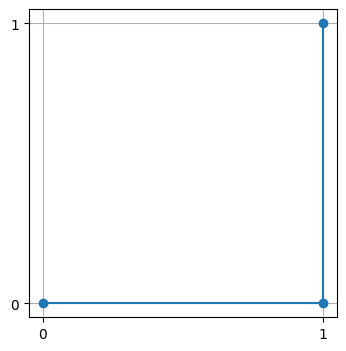

In [58]:
t=2
width_max=10
height=5

X=rand(height, 1, width_max)
r,d=t_core(X,t)
result=show(r)

print(f"{X}->{result}")
print("maya:",d[0])
print("t-quotient",d[1],"->",d[2])

x_points = [0]
y_points = [0]

x, y = 0, 0

for val in result:
    if val == 0:
        x += 1
    else:
        y += 1

    x_points.append(x)
    y_points.append(y)

fig, ax = plt.subplots(figsize=[4,4])

ax.plot(x_points, y_points, marker='o')
ax.set_xticks(np.arange(0,x_points[-1]+1, 1))
ax.set_yticks(np.arange(0,y_points[-1]+1, 1))
ax.set_aspect('equal')
ax.grid()
plt.show()

##t=2のとき

[19 19 15 12 11 10 10  8  5  1]->[0 1 0 1 0 1]
maya: [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1]
t-quotient [[0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1], [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]] -> [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


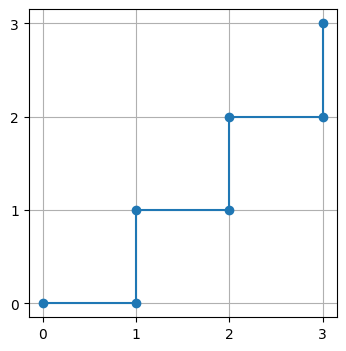

[18 16 15 14 13  7  5  3  2  2]->[0 1]
maya: [0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1]
t-quotient [[0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0], [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]] -> [[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


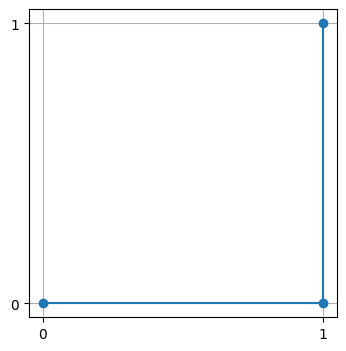

In [59]:
t=2
n=2
width_max=20
height=10

for i in range(n):
  X=rand(height, 1, width_max)
  r,d=t_core(X,t)
  result=show(r)

  print(f"{X}->{result}")
  print("maya:",d[0])
  print("t-quotient",d[1],"->",d[2])

  x_points = [0]
  y_points = [0]

  x, y = 0, 0

  for val in result:
      if val == 0:
          x += 1
      else:
          y += 1

      x_points.append(x)
      y_points.append(y)

  fig, ax = plt.subplots(figsize=[4,4])

  ax.plot(x_points, y_points, marker='o')
  ax.set_xticks(np.arange(0,x_points[-1]+1, 1))
  ax.set_yticks(np.arange(0,y_points[-1]+1, 1))
  ax.set_aspect('equal')
  ax.grid()
  plt.show()

段が１の階段状(または０)になっている

##t=3のとき

[16 15 13 13 11  9  9  7  3  2]->[0 1 1 0 1 0 0 1]
maya: [0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1]
t-quotient [[0, 0, 0, 1, 1, 0, 0, 0, 0], [0, 1, 0, 0, 1, 1, 1, 0, 1], [1, 0, 0, 0, 0, 0, 1, 1]] -> [[1, 1, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 0, 0, 0, 0], [1, 1, 1, 0, 0, 0, 0, 0]]


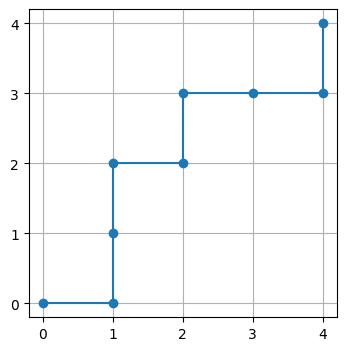

[18 18 18 17 16 16 10  8  7  7]->[0 1 1 0 1 1]
maya: [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1]
t-quotient [[0, 0, 0, 0, 0, 0, 0, 1, 0, 1], [0, 0, 1, 1, 1, 0, 0, 0, 1], [0, 0, 1, 0, 0, 0, 1, 1, 1]] -> [[1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 0, 0, 0, 0, 0], [1, 1, 1, 1, 0, 0, 0, 0, 0]]


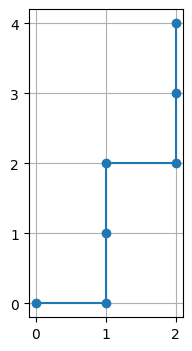

In [62]:
t=3
n=2
width_max=20
height=10

for i in range(n):
  X=rand(height, 1, width_max)
  r,d=t_core(X,t)
  result=show(r)

  print(f"{X}->{result}")
  print("maya:",d[0])
  print("t-quotient",d[1],"->",d[2])

  x_points = [0]
  y_points = [0]

  x, y = 0, 0

  for val in result:
      if val == 0:
          x += 1
      else:
          y += 1

      x_points.append(x)
      y_points.append(y)

  fig, ax = plt.subplots(figsize=[4,4])
  ax.plot(x_points, y_points, marker='o')
  ax.set_xticks(np.arange(0,x_points[-1]+1, 1))
  ax.set_yticks(np.arange(0,y_points[-1]+1, 1))
  ax.set_aspect('equal')
  ax.grid()
  plt.show()

## t=10のとき

[47 45 41 40 38 36 35 27 27 27 23 19 18 17 17 12 11 10  5  3]->[0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1]
maya: [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1]
t-quotient [[0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0], [0, 1, 1, 1, 0, 0, 0], [1, 0, 1, 0, 0, 1, 1], [0, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0], [1, 1, 0, 0, 0, 1, 1], [0, 0, 1, 1, 0, 0], [0, 0, 0, 1, 1, 1], [0, 0, 0, 1, 0, 0]] -> [[1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 0, 0, 0, 0], [1, 1, 1, 1, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 0, 0, 0], [1, 1, 0, 0, 0, 0], [1, 1, 1, 0, 0, 0], [1, 0, 0, 0, 0, 0]]


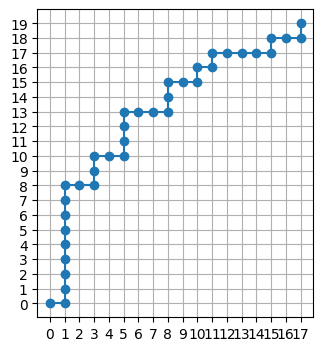

[46 41 39 31 31 28 22 21 18 18 17 13 13 12 11 10  8  6  3  2]->[0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1]
maya: [0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1]
t-quotient [[0, 0, 1, 0, 0, 0, 0], [0, 1, 1, 0, 0, 0, 0], [1, 0, 0, 0, 1, 0, 0], [0, 0, 0, 1, 0, 0, 0], [1, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 1], [0, 1, 1, 0, 1, 1], [0, 0, 0, 0, 1, 0], [1, 1, 1, 0, 0, 0], [0, 0, 1, 0, 0, 1]] -> [[1, 0, 0, 0, 0, 0, 0], [1, 1, 0, 0, 0, 0, 0], [1, 1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0], [1, 1, 0, 0, 0, 0, 0], [1, 1, 0, 0, 0, 0, 0], [1, 1, 1, 1, 0, 0], [1, 0, 0, 0, 0, 0], [1, 1, 1, 0, 0, 0], [1, 1, 0, 0, 0, 0]]


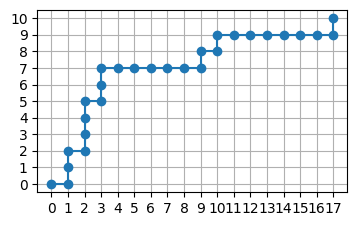

In [63]:
t=10
n=2
width_max=50
height=20

for i in range(n):
  X=rand(height, 1, width_max)
  r,d=t_core(X,t)
  result=show(r)

  print(f"{X}->{result}")
  print("maya:",d[0])
  print("t-quotient",d[1],"->",d[2])

  x_points = [0]
  y_points = [0]

  x, y = 0, 0

  for val in result:
      if val == 0:
          x += 1
      else:
          y += 1

      x_points.append(x)
      y_points.append(y)

  fig, ax = plt.subplots(figsize=[4,4])
  ax.plot(x_points, y_points, marker='o')
  ax.set_xticks(np.arange(0,x_points[-1]+1, 1))
  ax.set_yticks(np.arange(0,y_points[-1]+1, 1))
  ax.set_aspect('equal')
  ax.grid()
  plt.show()